In [ ]:
#Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()*100/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [ ]:
dt=list(df[((df.isnull().sum(axis=1)/df.shape[1])*100)>5].index) #5%
dt

[]

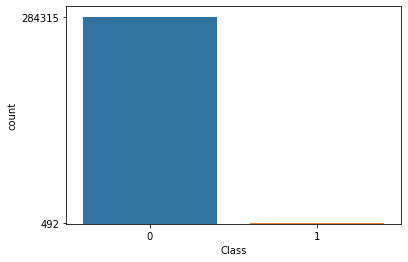

In [ ]:
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
amount=df['Amount'].values
df['Amount']=sc.fit_transform(amount.reshape(-1,1))

In [ ]:
df.drop(['Time'],axis=1,inplace=True)

In [ ]:
df.shape

(284807, 30)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(275663, 30)

In [ ]:
X=df.drop('Class',axis=1).values
Y=df['Class'].values

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
#RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#function create
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    Y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
ros = RandomOverSampler() 

In [ ]:
#apply randomoversampling for balance
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [ ]:
#apply randomoversampling for balance
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68788
           1       0.82      0.56      0.67       128

    accuracy                           1.00     68916
   macro avg       0.91      0.78      0.83     68916
weighted avg       1.00      1.00      1.00     68916

Confusion Matrix : 
[[68772    16]
 [   56    72]]


In [ ]:
#Train the model
lr.fit(X_train1,Y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Test the model
Y_pred=lr.predict(X_test1)

In [ ]:
print(classification_report(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
#create a function
def create_model1(model1):
    model1.fit(X_train1,Y_train1) #train the model
    Y_pred1=model1.predict(X_test1)#test the model
    print(classification_report(Y_test1,Y_pred1))
    print("Confustion Matrix")
    print(confusion_matrix(Y_test1,Y_pred1))
    return model1

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr=create_model1(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576

Confustion Matrix
[[67172  1616]
 [ 6461 62327]]


In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [ ]:
#call function 
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     68788
           1       1.00      0.69      0.82     68788

    accuracy                           0.85    137576
   macro avg       0.88      0.85      0.84    137576
weighted avg       0.88      0.85      0.84    137576

Confustion Matrix
[[68769    19]
 [21240 47548]]


In [ ]:
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(max_depth=4,criterion="entropy") 
#bydefault ctiterion ="gini"

In [ ]:
#call function
dt3=create_model1(dt3)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     68788
           1       0.93      0.86      0.89     68788

    accuracy                           0.90    137576
   macro avg       0.90      0.90      0.90    137576
weighted avg       0.90      0.90      0.90    137576

Confustion Matrix
[[64286  4502]
 [ 9700 59088]]


In [ ]:
#Naive Aggregation
#First take logistic regreesion 
#First create object of Logistic Regression class 
lr=LogisticRegression()

#Second take DecisionTreeClassifier : gini index
#Create the object of DecisionTreeClassifier  class
dt1=DecisionTreeClassifier() #bydefault method gini index

#Third take DecisionTreeClassifier : entropy method
#Create the object of DecisionTreeClassifier  class
dt2=DecisionTreeClassifier(criterion="entropy")

In [ ]:
model_list=[("Logistic",lr),("Decision_tree_gini",dt1),
            ("Decision_tree_entropy",dt2)]
#("model name",object of those model)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vc=VotingClassifier(estimators=model_list)

In [ ]:
#call create_model()
model=create_model1(vc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     68788
           1       1.00      0.75      0.86     68788

    accuracy                           0.87    137576
   macro avg       0.90      0.87      0.87    137576
weighted avg       0.90      0.87      0.87    137576

Confustion Matrix
[[68761    27]
 [17341 51447]]


In [ ]:
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [ ]:
model=create_model1(vc2)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     68788
           1       1.00      0.74      0.85     68788

    accuracy                           0.87    137576
   macro avg       0.90      0.87      0.87    137576
weighted avg       0.90      0.87      0.87    137576

Confustion Matrix
[[68767    21]
 [17897 50891]]


In [ ]:
#Bootstraping
#Bagging
from sklearn.ensemble import BaggingClassifier

In [ ]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=50,random_state=1)

In [ ]:
model=create_model1(bc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     68788
           1       0.98      0.87      0.92     68788

    accuracy                           0.93    137576
   macro avg       0.93      0.93      0.93    137576
weighted avg       0.93      0.93      0.93    137576

Confustion Matrix
[[67554  1234]
 [ 8609 60179]]


In [ ]:
#pasting
bc1= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=500,random_state=1,bootstrap=False) #means pasting 

In [ ]:
model=create_model1(bc1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.95      0.94      0.94    137576
weighted avg       0.95      0.94      0.94    137576

Confustion Matrix
[[66992  1796]
 [ 5962 62826]]


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
rf = RandomForestClassifier(max_depth = 4)

In [ ]:
rf=create_model1(rf)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     68788
           1       1.00      0.83      0.91     68788

    accuracy                           0.92    137576
   macro avg       0.93      0.92      0.91    137576
weighted avg       0.93      0.92      0.91    137576

Confustion Matrix
[[68573   215]
 [11419 57369]]


In [ ]:
#Stacking
from mlxtend.classifier import StackingClassifier

In [ ]:
lr=LogisticRegression()
dt1=DecisionTreeClassifier() #bydefault gini index
dt2=DecisionTreeClassifier(criterion="entropy")

In [ ]:
model_list=[lr,dt1,dt2]

In [ ]:
meta=LogisticRegression()

In [ ]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [ ]:
model=create_model1(sc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     68788
           1       1.00      0.75      0.86     68788

    accuracy                           0.87    137576
   macro avg       0.90      0.87      0.87    137576
weighted avg       0.90      0.87      0.87    137576

Confustion Matrix
[[68769    19]
 [17341 51447]]


In [ ]:
#ADA Boosting
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
ada=AdaBoostClassifier(n_estimators=100)

In [ ]:
model=create_model1(ada)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     68788
           1       0.99      0.87      0.92     68788

    accuracy                           0.93    137576
   macro avg       0.94      0.93      0.93    137576
weighted avg       0.94      0.93      0.93    137576

Confustion Matrix
[[68265   523]
 [ 9218 59570]]


In [ ]:
#ExtreamGradientBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)

In [ ]:
xgb=create_model1(xgb)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     68788
           1       1.00      0.82      0.90     68788

    accuracy                           0.91    137576
   macro avg       0.92      0.91      0.91    137576
weighted avg       0.92      0.91      0.91    137576

Confustion Matrix
[[68647   141]
 [12451 56337]]


In [ ]:
#SupportVectorMachine
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
svc=LinearSVC(random_state=3)#bydefault hard margin

In [ ]:
#call function (for train,Test and print report)
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.94     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67351  1437]
 [ 5913 62875]]


In [ ]:
#Soft Margin
svc=LinearSVC(random_state=1,C=0.05)

In [ ]:
#call function
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.91      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confustion Matrix
[[67457  1331]
 [ 5913 62875]]


In [ ]:
X=df.drop("Class",axis=1) #input variable
Y=df["Class"] #Target variable

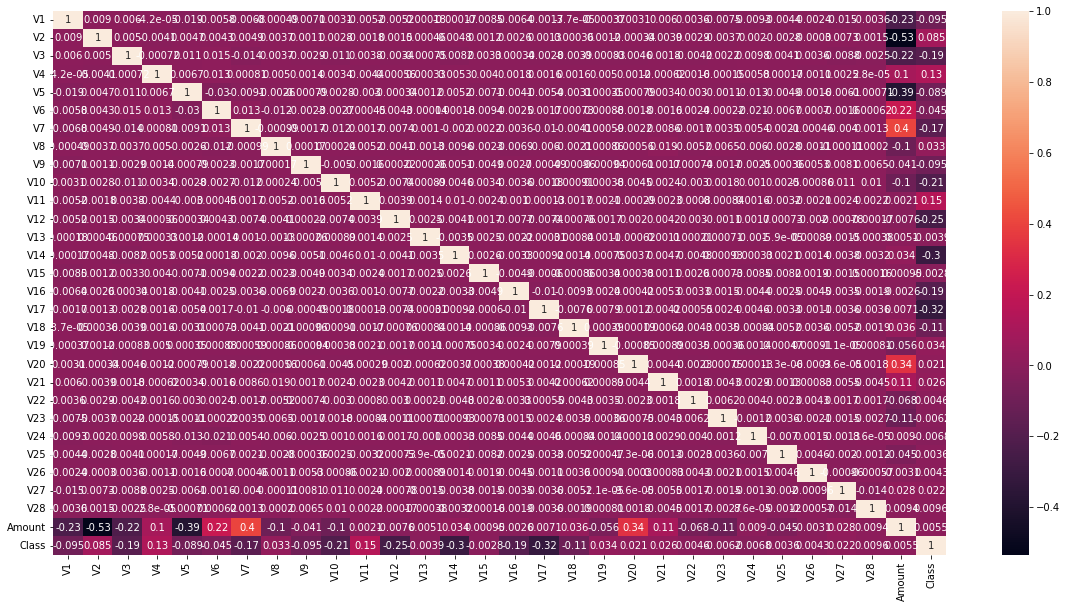

In [ ]:
#FeatureSelection
#correlation coefficient
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Annova Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
anova=SelectKBest(score_func=f_regression,k=15)

In [ ]:
X_train_imp=anova.fit_transform(X_train1,Y_train1)
X_test_imp=anova.transform(X_test1)

In [ ]:
anova.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr1=LinearRegression()

In [ ]:
#Train the model
lr1.fit(X_train_imp,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Check score
lr1.score(X_test_imp,Y_test1)

0.6077216848486495

In [ ]:
#Bbecause of negative Values in the dataset we can't apply chi-square Test

In [ ]:
#Wrapper Method
#Forward Selection
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
columns=[] #columns is the user defined list object
for col in X:
    #print(col)
    columns.append(col)
    print(columns)

['V1']
['V1', 'V2']
['V1', 'V2', 'V3']
['V1', 'V2', 'V3', 'V4']
['V1', 'V2', 'V3', 'V4', 'V5']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']
['V1', 'V2', 'V3', 'V4', 'V5'

In [ ]:
#FORWARD SELECTION
columns=[] #columns is the user defined list object
for col in X:
    #print(col)
    columns.append(col)
    #print(columns)
    X_new=df[columns] #new input
    #call train_test_split()
    X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
    #create object of LinearRegression class
    lr=LinearRegression()
    #train the model
    lr.fit(X_train1,Y_train1)
    #find score
    score=lr.score(X_test1,Y_test1)
    print("Column : ",col," Score : ",score)

Column :  V1  Score :  0.008049906445355859
Column :  V2  Score :  0.014829607693038871
Column :  V3  Score :  0.04502740013687734
Column :  V4  Score :  0.06019298100028846
Column :  V5  Score :  0.06522999576923494
Column :  V6  Score :  0.0680427439509651
Column :  V7  Score :  0.09684045771734884
Column :  V8  Score :  0.09718457050136098
Column :  V9  Score :  0.10542103493340127
Column :  V10  Score :  0.1460189194123266
Column :  V11  Score :  0.1641484840016324
Column :  V12  Score :  0.22215649325142675
Column :  V13  Score :  0.22216008661679068
Column :  V14  Score :  0.309488820516705
Column :  V15  Score :  0.30949873863221244
Column :  V16  Score :  0.34223496499037986
Column :  V17  Score :  0.4375220767652669
Column :  V18  Score :  0.44887583760982946
Column :  V19  Score :  0.44971340604872095
Column :  V20  Score :  0.4500743086584965
Column :  V21  Score :  0.45113855287094196
Column :  V22  Score :  0.45114563975360017
Column :  V23  Score :  0.4511570141829134
Col

In [ ]:
#Backward Selection
columns=[]
X_new=X
n_col=X_new.shape[1] #no. of columns
#print(n_col)
for i in range(n_col,0,-1): 
    columns.append(X_new)
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,Y,test_size=0.3,random_state=1)
     #create a object of LinearRegression
    lr=LinearRegression()
    #we train the model
    lr.fit(X_train1,y_train1)
    #find the score
    score1=lr.score(X_test1,y_test1)
    print("Column : ",i, " Score : ",score1)
    X_new=X_new.iloc[:,:-1]  #iloc index location iloc[startrow:stoprow ,startcol:-1]
    #iloc[rowindex,colindex]
    print("After Remove Column : ", i)

Column :  29  Score :  0.451826990273182
After Remove Column :  29
Column :  28  Score :  0.45151002239031596
After Remove Column :  28
Column :  27  Score :  0.4514188657712781
After Remove Column :  27
Column :  26  Score :  0.4512551616437064
After Remove Column :  26
Column :  25  Score :  0.4512337359842436
After Remove Column :  25
Column :  24  Score :  0.45121500801961506
After Remove Column :  24
Column :  23  Score :  0.4511570141829134
After Remove Column :  23
Column :  22  Score :  0.45114563975360017
After Remove Column :  22
Column :  21  Score :  0.45113855287094196
After Remove Column :  21
Column :  20  Score :  0.4500743086584965
After Remove Column :  20
Column :  19  Score :  0.44971340604872095
After Remove Column :  19
Column :  18  Score :  0.44887583760982946
After Remove Column :  18
Column :  17  Score :  0.4375220767652669
After Remove Column :  17
Column :  16  Score :  0.34223496499037986
After Remove Column :  16
Column :  15  Score :  0.30949873863221244

In [ ]:
#Embedded Method
#Lasso Regularization

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train1,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
training_score=lr.score(X_train1,Y_train1)
print("Training Score : ",training_score)

Training Score :  0.009376512025333739


In [ ]:
#check testing score :
testing_score=lr.score(X_test1,Y_test1)
print("Testing Score : ",testing_score)

Testing Score :  0.008049906445355859


In [ ]:
m=lr.coef_
m=np.round(m,2)
print(m)

[-0.]


In [ ]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
lr.intercept_

0.0016287509182190832

In [ ]:
from sklearn.linear_model import Lasso 
l1=Lasso(1000)
l1.fit(X_train1,Y_train1)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#Check coefficient/slope after apply Lasso 
l1.coef_

array([-0.])

In [ ]:
m=lr.coef_
a=[]#empty list declare
for i in m:
    i=np.round(i,2)
    a.append(i)
print(a)

[-0.0]


In [ ]:
#slope after perform Lasso
m1=l1.coef_
b=[]#empty list declare
for i in m1:
    i=np.round(i,3)
    b.append(i)
print(b)

[-0.0]


In [ ]:
# initialize list of lists
c=X.columns
L = list(zip(c,a,b))#zip() : to merge 2 or more list

# Create the pandas DataFrame
df1=pd.DataFrame(L, columns=['column','original_slope','Lasso_slope'])
df1

,column,original_slope,Lasso_slope
0,V1,-0.0,-0.0


In [ ]:
print("Score : ")
for i in range(200,1001,50): #start=200 stop=1001-1=1000 step=+50
    #create the object of Lasso class
    l1=Lasso(i)  #i=200 next time i=250 then i=300 upto i=1000
    #train the model
    l1.fit(X_train1,Y_train1)
    score=l1.score(X_test1,Y_test1)
    print(np.round(score,2))

Score : 
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


In [ ]:
#PCA
from sklearn.decomposition import PCA
#Create object of PCA
pc=PCA(n_components=1,random_state=1)#n_components : how many principal components
X_train_pc=pc.fit_transform(X_train1,Y_train1)

In [ ]:
#X_train_pc
X_test_pc=pc.transform(X_test1)

In [ ]:
#create the object of LinearRegression class
lr=LinearRegression()

In [ ]:
#train the model
lr.fit(X_train_pc,Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#check score
lr.score(X_test_pc,Y_test1)

0.008049906445355859